## Informations sur la base de données


Grossesses, en nombre de fois où la personne a été enceinte.

  Glucose, en taux de glucose dans le sang lors du test.

  Tension artérielle qui correspond la tension artérielle prise pendant le diastole.

  Perimetre bracial qui correspond à l'épaisseur du pli cutané du triceps.

  Insuline qui décrit la quantité d'insuline.

  Indice de masse corporelle.

  Fonction diabete qui correspond aux antécédents familiaux de la personne.

  Age décrit l'âge de la personne.

  resultat qui est la prediction du statut actuel de diabète ou non de la patiente.



## Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## Ouverture de la base de données

In [4]:
data=pd.read_csv('diabetes.csv')

In [5]:
data.head(5)

,Grossesses,Glucose,Pression_arterielle,perimetre_bracial,Taux_insuline,IMC,Fonction_diabete,Age,Resultat
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploration des données

In [8]:
# Affichage des dimensions de la base de données
print(f'La base de données contient {data.shape[0]} cas et {data.shape[1]} variables ou attributs')

La base de données contient 768 cas et 9 variables ou attributs


In [9]:
data.dtypes

Grossesses               int64
Glucose                  int64
Pression_arterielle      int64
perimetre_bracial        int64
Taux_insuline            int64
IMC                    float64
Fonction_diabete       float64
Age                      int64
Resultat                 int64
dtype: object

In [10]:
# Check if there are any missing values
data.isnull().sum()

Grossesses             0
Glucose                0
Pression_arterielle    0
perimetre_bracial      0
Taux_insuline          0
IMC                    0
Fonction_diabete       0
Age                    0
Resultat               0
dtype: int64

## Machine Learning

In [12]:
## Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

import pickle

In [13]:
# Variables explicatives
X = data.drop(['Resultat'], axis=1)
# Variable à expliquer
y = data['Resultat']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.25)

In [15]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [16]:
lg.fit(X_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [17]:
y_pred = lg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       123
           1       0.62      0.65      0.63        69

    accuracy                           0.73       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.73      0.73      0.73       192



Text(0.5, 15.0, 'Predicted label')

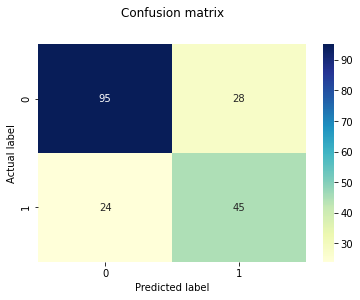

In [19]:
# confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print(lg.predict([[1,50,25,16,152,78.3,0.183,33]]))

[1]
